# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
import shutil
import matplotlib.pyplot as plt
from PIL import Image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Segmentation Image Dataset Merger

In [ ]:
class MoveImages:
  def __init__(self, raw_dataset_path, interim_dataset_path, lookfor, out):
    self.raw_dataset_path = raw_dataset_path
    self.interim_dataset_path = interim_dataset_path
    self.lookfor = lookfor
    self.out = out
    self.valid_extensions = {".png", ".jpg", ".jpeg"}

  def get_all_paths(self, word):
    folders = []
    path = os.path.join(self.raw_dataset_path, word)
    for item in os.listdir(path):
      full_path = os.path.join(path, item)
      if os.path.isdir(full_path):
        folders.append(full_path)
    return folders

  def make_directory(self, name):
    out_folder = os.path.join(self.interim_dataset_path, name)
    os.makedirs(out_folder, exist_ok=True)
    return out_folder

  def copy_unique_files(self, src_folder, dest_folder):
    for filename in os.listdir(src_folder):
      src_file = os.path.join(src_folder, filename)
      if os.path.isfile(src_file) and os.path.splitext(filename)[1].lower() in self.valid_extensions:
        dest_file = os.path.join(dest_folder, filename)
        if not os.path.exists(dest_file):
          shutil.copy2(src_file, dest_file)
        else:
          # print(f"Duplicate skipped: {filename}")
          pass

  def do_all_processes(self):
    for src_root in self.lookfor:
      print(f"\nProcessing folder: {src_root}")
      source_folders = self.get_all_paths(src_root)
      out_folder = self.make_directory(os.path.join(src_root, self.out))

      for src in source_folders:
        self.copy_unique_files(src, out_folder)
        print(f"✔ Copied from {src}")

      print(f"Pasted to {out_folder}")

In [ ]:
raw_segmentation_dataset_path = "/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/raw/segmentation"
interim_segmentation_dataset_path = "/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/interim/segmentation"
mover = MoveImages(raw_segmentation_dataset_path, interim_segmentation_dataset_path, lookfor=["images", "mask"], out="original")
mover.do_all_processes()


Processing folder: images
✔ Copied from /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/raw/segmentation/images/glioma
✔ Copied from /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/raw/segmentation/images/meningioma
✔ Copied from /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/raw/segmentation/images/no tumor
✔ Copied from /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/raw/segmentation/images/pituitary
Pasted to /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/interim/segmentation/images/original

Processing folder: mask
✔ Copied from /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/raw/segmentation/mask/2
✔ Copied from /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/raw/segmentation/mask/3
✔ Copied from /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/raw/segmentation/mask/0
✔ Copied from /content/drive/M

In [ ]:
merged_images_len = len(os.listdir(os.path.join(interim_segmentation_dataset_path, "images/original")))
merged_masks_len = len(os.listdir(os.path.join(interim_segmentation_dataset_path, "mask/original")))

print("merged_images_len:", merged_images_len)
print("merged_masks_len:", merged_masks_len)

merged_images_len: 6380
merged_masks_len: 6380


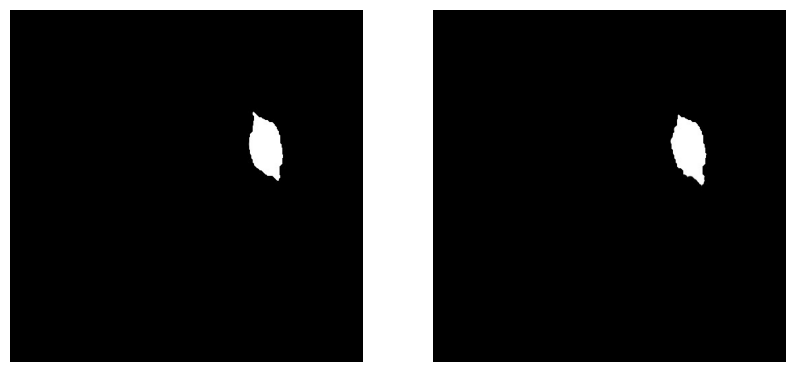

In [ ]:
p1 = "/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/interim/segmentation/mask/original/Tr-me_0540.jpg"
p2 = "/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/interim/segmentation/mask/original/Tr-me_0540_m.jpg"
img1 = Image.open(p1).convert("L")  # convert to grayscale
img2 = Image.open(p2).convert("L")  # convert to grayscale

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(img1, cmap="gray")
ax[0].axis("off")
ax[1].imshow(img2, cmap="gray")
ax[1].axis("off")
plt.show()

In [ ]:
for i in os.listdir("/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/interim/segmentation/images/original"):
  if "_0540" in i:
    print(i)

Tr-me_0540.jpg
Tr-no_0540.jpg
Tr-pi_0540.jpg


In [ ]:
for i in os.listdir("/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/interim/segmentation/mask/original"):
  if "_0540" in i:
    print(i)

Tr-me_0540.jpg
Tr-me_0540_m.jpg
Tr-pi_0540_m.jpg
Tr-no_0540_m.jpg


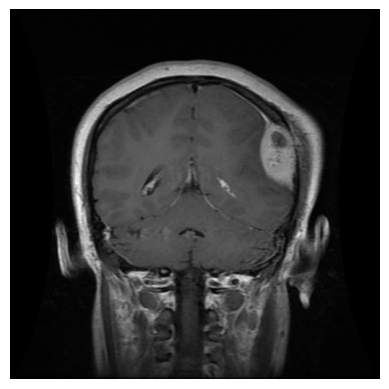

In [ ]:
p3 = "/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/interim/segmentation/images/original/Tr-me_0540.jpg"
img3 = Image.open(p3).convert("L")  # convert to grayscale
plt.imshow(img3, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
for i in os.listdir("/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/interim/segmentation/mask/original"):
  if "me_0540" in i:
    print(i)

Tr-me_0540.jpg
Tr-me_0540_m.jpg


In [ ]:
for i in os.listdir("/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/raw/segmentation/mask/2"):
  if "_0540" in i:
    print(i)

Tr-me_0540.jpg
Tr-me_0540_m.jpg


In [ ]:
for i in os.listdir("/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/raw/segmentation/images/meningioma"):
  if "_0540" in i:
    print(i)

Tr-me_0540.jpg


In [ ]:
old = []
for i in os.listdir("/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/interim/segmentation/mask/original"):
  old.append(i.split("_")[1])

In [ ]:
new = []
for i in os.listdir("/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/interim/segmentation/images/original"):
  if i.split("_")[1][:-4] not in old:
    new.append(i)

In [ ]:
new

['Tr-me_0859 (1).jpg']

In [ ]:
for i in os.listdir("/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/interim/segmentation/images/original"):
  if "0859" in i:
    print(i)

Tr-gl_0859.jpg
Tr-gl_100859.jpg
Tr-me_0859 (1).jpg
Tr-me_0859.jpg
Tr-no_0859.jpg
Tr-pi_0859.jpg


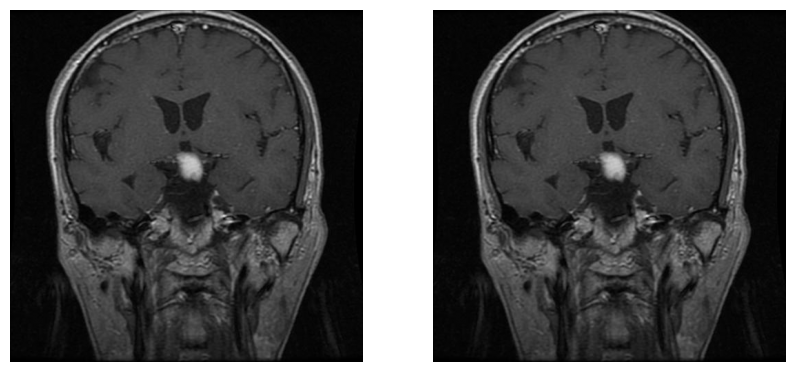

In [ ]:
p1 = "/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/interim/segmentation/images/original/Tr-me_0859 (1).jpg"
p2 = "/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/interim/segmentation/images/original/Tr-me_0859.jpg"
img1 = Image.open(p1).convert("L")  # convert to grayscale
img2 = Image.open(p2).convert("L")  # convert to grayscale

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(img1, cmap="gray")
ax[0].axis("off")
ax[1].imshow(img2, cmap="gray")
ax[1].axis("off")
plt.show()

In [ ]:
for i in os.listdir("/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/interim/segmentation/mask/original"):
  if "0859" in i:
    print(i)

Tr-me_0859_m.jpg
Tr-pi_0859_m.jpg
Tr-no_0859_m.jpg
Tr-gl_100859_m.jpg
Tr-gl_0859_m.jpg


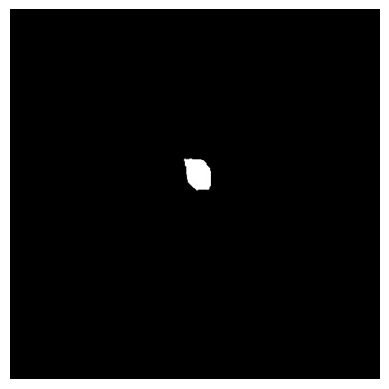

In [ ]:
p3 = "/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/interim/segmentation/mask/original/Tr-me_0859_m.jpg"
img3 = Image.open(p3).convert("L")  # convert to grayscale
plt.imshow(img3, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
os.remove("/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/interim/segmentation/images/original/Tr-me_0859 (1).jpg")
os.remove("/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/interim/segmentation/mask/original/Tr-me_0540_m.jpg")

In [ ]:
merged_images_len = len(os.listdir(os.path.join(interim_segmentation_dataset_path, "images/original")))
merged_masks_len = len(os.listdir(os.path.join(interim_segmentation_dataset_path, "mask/original")))

print("merged_images_len:", merged_images_len)
print("merged_masks_len:", merged_masks_len)

merged_images_len: 6380
merged_masks_len: 6380
